# Importing necesaries packages and models

In [98]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score,   f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# EDA

In [41]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
data.shape

(284807, 31)

In [43]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
(pd.DataFrame(data = data.isnull().sum(), columns= ["Missing Value"])).T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Missing Value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
classes = data["Class"].value_counts()
Normal_Transaction_share = round((classes[0]/data["Class"].count())*100, 2)
Fraud_Transaction_share = round((classes[1]/data["Class"].count())*100, 2)
print(Normal_Transaction_share, Fraud_Transaction_share)
print("Fraud_Transaction_share is only {}% of total transactions".format(Fraud_Transaction_share))

99.83 0.17
Fraud_Transaction_share is only 0.17% of total transactions


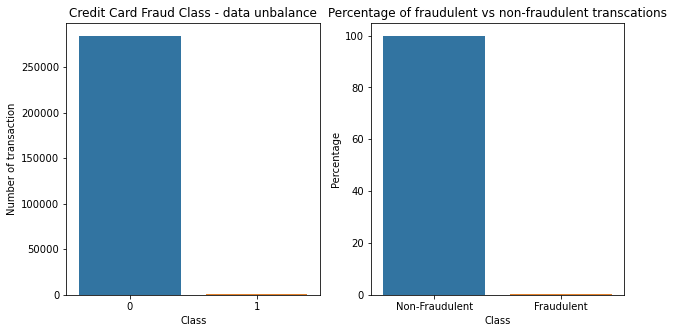

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[Normal_Transaction_share, Fraud_Transaction_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()


In [48]:
#Inference: Dataset is highly imbalance.There are only 0.17 % of Fraud transaction out of total transaction.

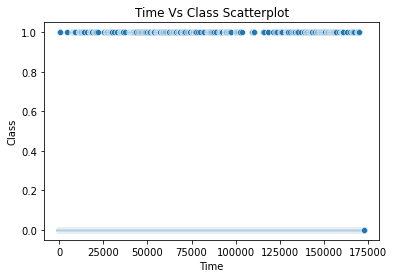

In [49]:
sns.scatterplot(data["Time"], data["Class"])
plt.title("Time Vs Class Scatterplot")
plt.show()

In [50]:
#Inference: Both class are distributed over time. Thus no major insight drawn

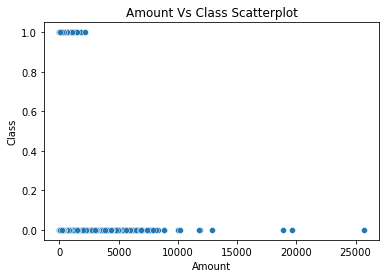

In [51]:
sns.scatterplot(data["Amount"], data["Class"])
plt.title("Amount Vs Class Scatterplot")
plt.show()

In [52]:
#Inference: Low amount transaction are very few. Lower amounts are more likely to be fradulent transactions.

In [53]:
#Dropping Time column as it does not convey any useful insight.
data.drop("Time", axis = 1, inplace = True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Figure size 432x288 with 0 Axes>

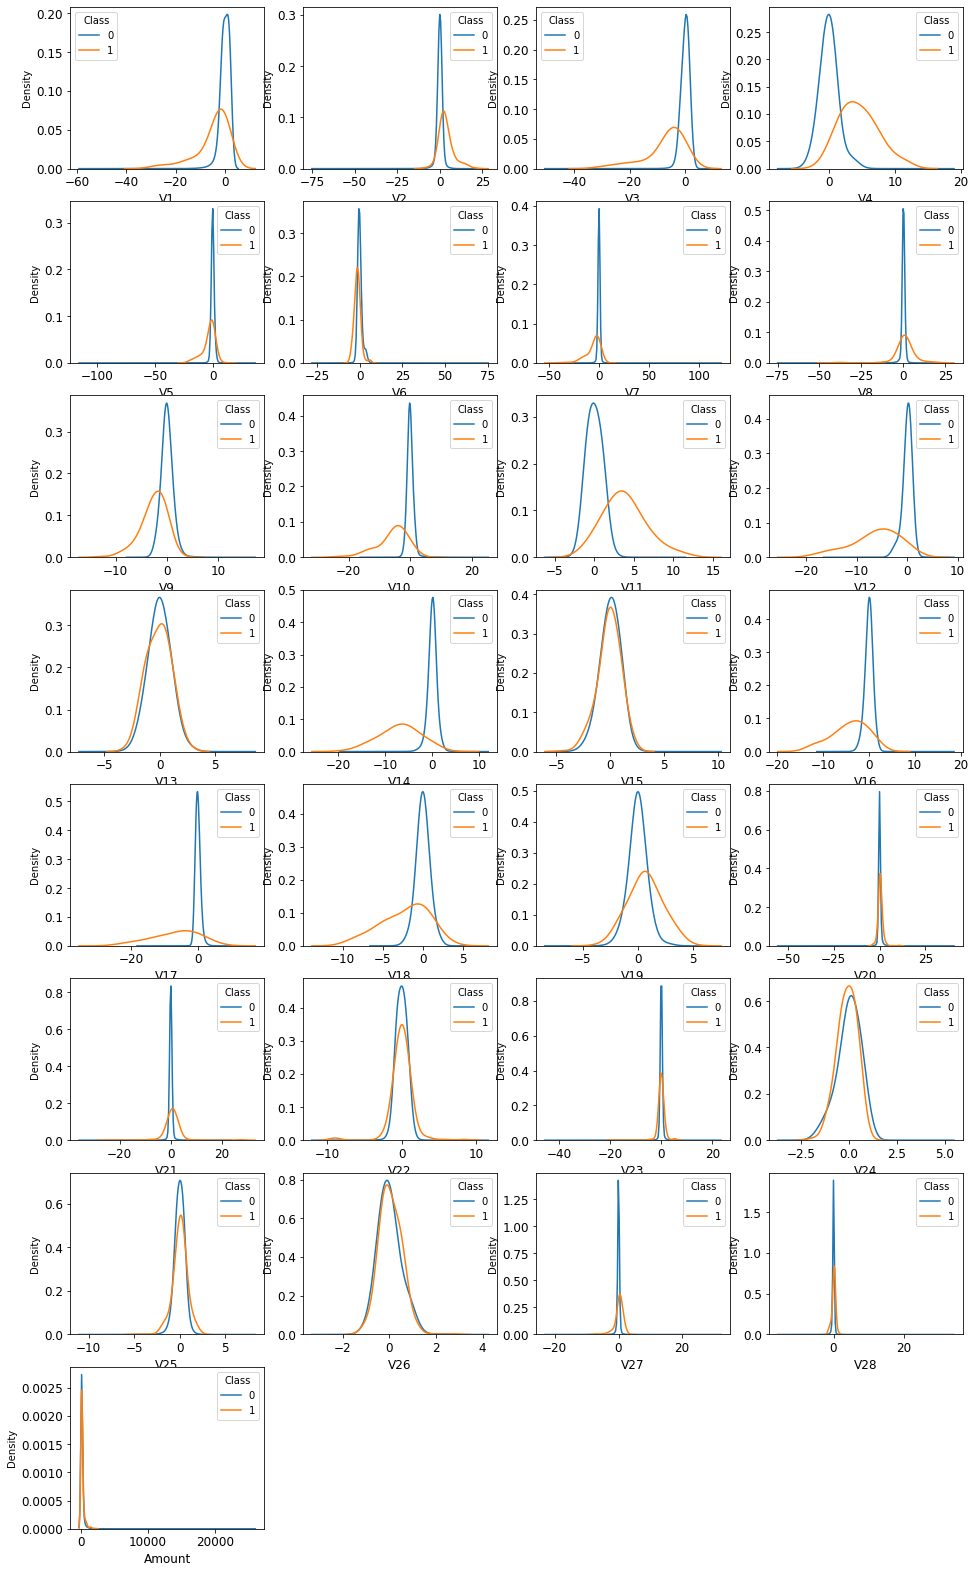

In [54]:
# Plotting all the variable in displot to visualise the distribution
var = list(data.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(6,5,figsize=(16,28))

for feature in var:
    i += 1 
    
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5, hue= data["Class"])
    sns.kdeplot(t1[feature], bw=0.5, hue= data["Class"])
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
        
    
plt.show()

# Spilitting data for train and test

In [55]:
X = data.drop("Class", axis =1 )
y= data["Class"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 233 )

In [57]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
384
108


# Feature Scaling

In [58]:
#Only scaling Amount feature as other features are already scaled using PCA
scaled  = StandardScaler()
X_train[["Amount"]] = scaled.fit_transform(X_train[["Amount"]])

X_test[["Amount"]] = scaled.fit_transform(X_test[["Amount"]])


In [59]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
251527,2.141543,-0.643542,-1.551417,-0.541024,-0.227185,-0.782443,-0.110821,-0.277358,-0.876108,1.064115,0.349943,0.624625,0.255654,0.416196,-0.933087,-1.512464,-0.325091,1.108690,-0.154885,-0.563918,-0.461418,-0.780095,0.198362,-0.408668,-0.149191,0.522654,-0.078874,-0.077166,-0.253584
6804,-1.250450,-0.122507,3.650608,-0.125998,-1.232319,0.324196,-0.367236,0.110759,3.061066,-1.196420,-0.292267,-2.303551,0.919288,-0.201469,-2.532724,-0.363761,0.970691,0.010760,-0.310114,0.026372,-0.151095,0.488568,-0.348191,0.771678,0.244891,1.101085,0.003635,-0.114208,-0.052988
34737,-6.430397,-3.323556,-0.096033,-2.270376,0.482668,-1.490782,1.422743,-2.943627,1.009256,4.937518,-0.051643,-1.383790,0.453711,-2.955229,-0.735767,-0.598828,-0.760421,-1.037273,-0.993571,-3.950788,-1.235783,0.307432,-1.011466,0.556271,-0.027477,-0.840241,-4.917169,3.083596,0.048922
83936,-0.711683,-3.912156,-1.246565,0.222210,-1.659383,-0.107725,1.163951,-0.452248,-1.282019,0.262359,0.768519,1.000833,1.133182,0.279477,-0.667179,-1.383055,-0.090182,1.339782,-0.381694,1.790740,0.245673,-1.153325,-1.033389,0.084119,0.082668,0.979160,-0.273466,0.175177,4.056779
81801,-0.864896,1.190592,1.137537,-0.396576,0.566103,0.360082,0.457743,-1.833748,-0.055919,0.578918,1.140538,0.056246,-0.954193,0.182258,0.360595,-0.132924,-0.491802,0.066124,-0.028730,-0.186683,1.562167,-0.018464,-0.012263,-0.331876,-0.384004,0.286669,-0.040147,-0.242412,-0.322745


In [60]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264467,-1.366485,1.369726,1.326549,-0.453401,-0.315385,-0.402815,0.429022,-0.054603,0.508433,-0.196863,-0.740702,0.727164,1.211425,-0.496553,0.496039,-0.158586,-0.480544,-0.163477,0.378114,-0.103986,-0.100098,-0.111341,-0.094717,0.040559,-0.381724,-0.680917,-1.238758,-0.658797,-0.286460
221143,1.819865,-0.453757,-2.069324,0.137045,0.668149,0.729728,-0.379142,0.484349,1.262592,-0.784005,0.793113,-0.642595,-3.280000,-0.722647,0.338150,-0.317172,1.717965,-0.179304,-0.428487,-0.368965,-0.176611,-0.402310,0.182338,-1.842393,-0.343192,0.029944,0.012926,-0.045547,-0.168673
35454,-2.251744,-1.686170,1.911122,-1.264348,1.805624,-0.824740,-1.241617,0.586153,1.144972,-1.055300,-0.395511,0.158399,-0.935563,0.021139,0.100310,0.463295,-1.073798,1.497537,0.485614,0.591610,0.267363,0.319185,-0.153645,-0.973719,0.866853,-0.424624,0.251888,0.152311,-0.242989
275403,2.116244,0.012457,-1.930695,0.308227,0.591020,-0.833195,0.465703,-0.329913,0.658880,-0.056122,-1.259530,0.098084,-0.512745,0.527365,-0.205787,-0.675213,-0.199143,-0.455539,0.365275,-0.263618,-0.036370,0.095440,0.038446,0.488448,0.410175,-0.236106,-0.043286,-0.064096,-0.347024
213573,-3.326674,-3.151283,0.745109,-3.717480,2.828793,3.082145,-2.556352,2.088425,3.031981,-2.956294,-1.169476,1.342743,-0.402675,-0.714074,-1.013258,-0.843969,0.062368,0.347027,-0.042004,0.710949,0.371875,0.490118,-0.464913,0.781144,1.051861,-0.702102,0.321816,-0.356733,-0.215912


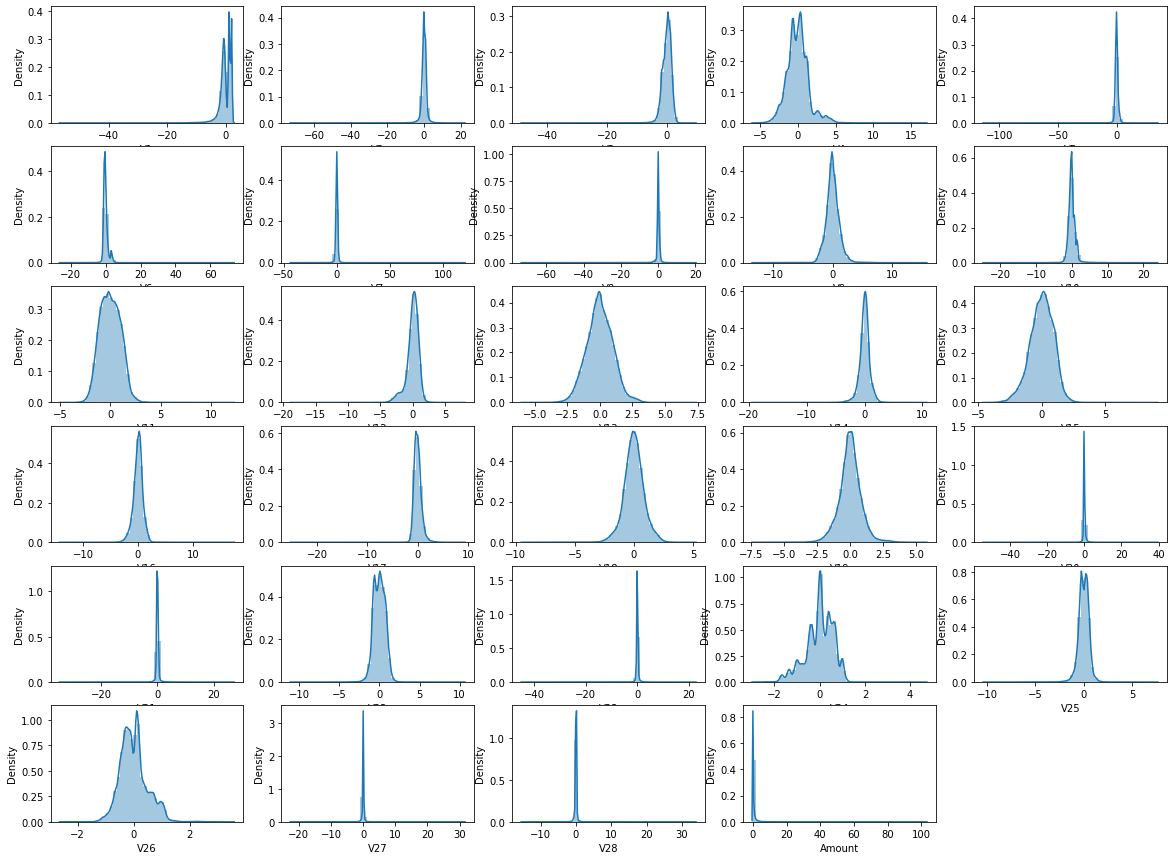

In [61]:
#Checking skewness

feat = X_train.columns

plt.figure(figsize= (20, 15))

i = 0

for col in feat:
    i +=1
    plt.subplot(6,5, i)
    sns.distplot(X_train[col])
    
plt.show()
    

In [65]:
#Since distribution of many features are skewed, we will check the skewness value.



feat = X_train.columns
skew_list = []
for i in feat:
    skew_list.append(X_train[i].skew())

skewed_feat = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skewed_feat.set_index("Features", inplace=True)
skewed_feat.T
    

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.37173,-4.776486,-2.30037,0.677408,-2.821748,1.926184,3.404404,-8.705215,0.559895,1.252101,0.346174,-2.242543,0.068356,-1.941382,-0.307792,-1.086688,-3.857622,-0.268626,0.114526,-2.709185,3.333862,-0.202259,-6.132658,-0.550106,-0.405344,0.578555,-0.93365,12.284386,17.262832


In [69]:
skewed = skewed_feat.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')

In [70]:
#Since the above rows are skewed, to make tham gaussian using PowerTransformer from sklearn


pt = PowerTransformer(copy=False)

X_train[skewed] = pt.fit_transform(X_train[skewed])


X_test[skewed] = pt.transform(X_test[skewed])

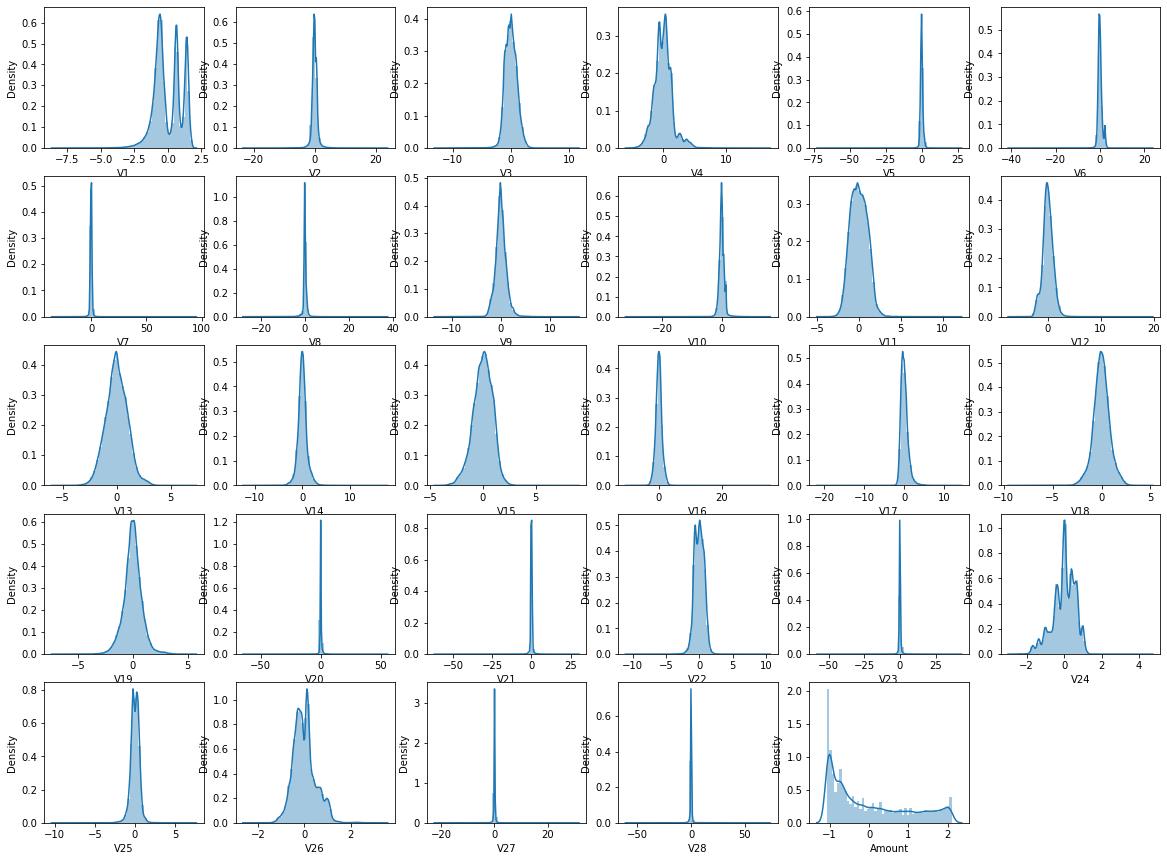

In [71]:
feat = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in feat:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

# Model Building using Imbalance Dataset

## 1) LogisticRegression

In [110]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9800763787027776
Best hyperparameters:  {'C': 0.01}


In [111]:
#cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.173856,0.189968,0.048630,0.008143,0.01,{'C': 0.01},0.968249,0.976531,0.979003,0.992657,0.983942,0.980076,0.008085,1,0.985111,0.984429,0.984220,0.980350,0.981692,0.983160,0.001822
1,3.241969,0.158728,0.058440,0.013962,0.1,{'C': 0.1},0.962272,0.973197,0.976448,0.992513,0.981508,0.977188,0.009924,2,0.983051,0.982769,0.982318,0.978215,0.979718,0.981214,0.001910
2,3.895001,0.212461,0.051436,0.001745,1,{'C': 1},0.959891,0.972575,0.975396,0.991910,0.980624,0.976079,0.010450,3,0.982357,0.982026,0.981661,0.977496,0.978861,0.980480,0.001941
3,3.948241,0.233702,0.054038,0.005180,10,{'C': 10},0.959638,0.972533,0.975253,0.991815,0.980487,0.975945,0.010493,4,0.982276,0.981923,0.981574,0.977408,0.978735,0.980383,0.001946
4,4.157096,0.229717,0.060040,0.012386,100,{'C': 100},0.959599,0.972521,0.975235,0.991804,0.980470,0.975926,0.010501,5,0.982265,0.981913,0.981565,0.977399,0.978724,0.980373,0.001946
5,3.912962,0.612703,0.044828,0.017790,1000,{'C': 1000},0.959599,0.972518,0.975233,0.991803,0.980468,0.975924,0.010501,6,0.982266,0.981911,0.981565,0.977399,0.978721,0.980372,0.001946


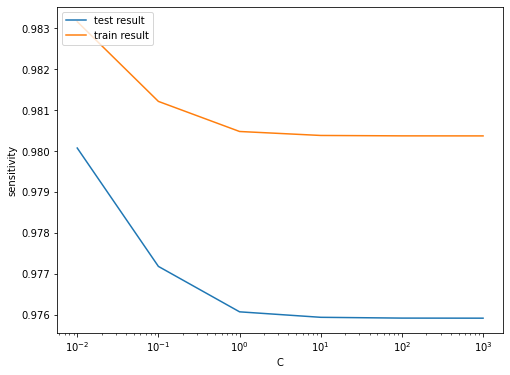

In [112]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [113]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [114]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [115]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [116]:
display_scores(y_train, y_train_pred)

F1 Score: 75.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227461
           1       0.91      0.64      0.75       384

    accuracy                           1.00    227845
   macro avg       0.96      0.82      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [117]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

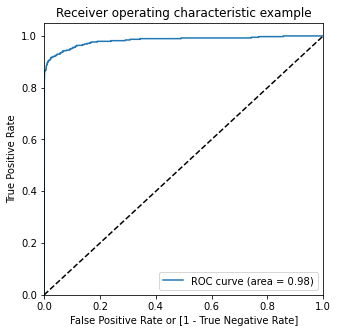

In [120]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [121]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.84      0.63      0.72       108

    accuracy                           1.00     56962
   macro avg       0.92      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [122]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

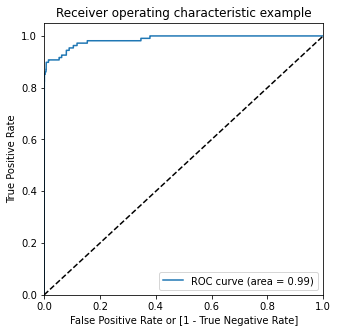

In [123]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model Summary
Train set

ROC : 98%
F1 Score: 75.23%


Test set

ROC : 99%
F1 score: 71.96%

# 2) Decision Tree

In [125]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [126]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.174466,0.041842,0.126420,0.010345,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.935434,0.951092,0.907814,0.931447,0.017892,6
1,7.259523,0.057019,0.088726,0.031051,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.935457,0.951092,0.907814,0.931454,0.017893,5
2,7.233838,0.081374,0.063709,0.004030,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.934863,0.958698,0.907613,0.933725,0.020871,2
3,7.091410,0.013434,0.065377,0.001700,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.930856,0.958698,0.907613,0.932389,0.020883,4
4,13.753198,0.040500,0.070714,0.005797,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.953531,0.951727,0.893714,0.932990,0.027783,3
5,14.025048,0.155889,0.071715,0.005561,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.953519,0.951724,0.901343,0.935529,0.024184,1
6,13.981353,0.024360,0.076384,0.014828,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.937705,0.958630,0.893004,0.929780,0.027372,7
7,13.909302,0.022877,0.054370,0.006950,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932645,0.958631,0.892961,0.928079,0.027004,8


In [127]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9355285836515627
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [166]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [167]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 77.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227461
           1       0.81      0.74      0.77       384

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



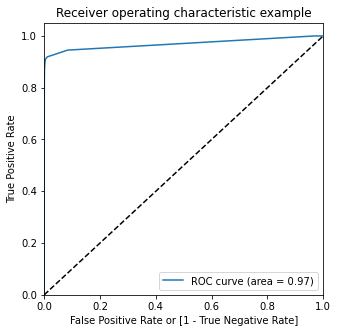

In [168]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [169]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 77.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.83      0.73      0.78       108

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



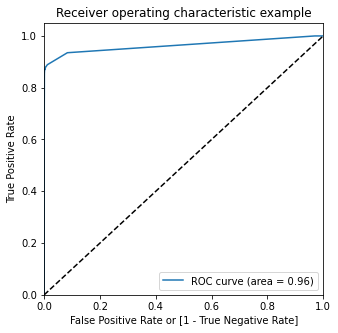

In [170]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model Summary
Train set

ROC : 97% F1 Score: 77.38%

Test set

ROC : 96% F1 score: 77.83%

# 3) XGBoost

In [134]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:07]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [135]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.698544,0.228580,0.150101,2.147774e-02,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978726,0.978702,0.962792,0.973407,0.007506,3,0.999721,0.999646,0.999767,0.999711,4.979757e-05
1,42.920229,1.404926,0.139094,1.415224e-02,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.973254,0.981557,0.970801,0.975204,0.004602,2,0.999959,0.999942,0.999982,0.999961,1.602574e-05
2,53.792992,1.199353,0.130755,2.496233e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978095,0.983023,0.968587,0.976568,0.005992,1,0.999952,0.999875,0.999953,0.999927,3.640158e-05
3,28.366152,1.687433,0.129087,4.495664e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.958408,0.973014,0.962383,0.964602,0.006166,6,0.999993,0.999993,0.999995,0.999994,7.410520e-07
4,39.736257,0.657141,0.129421,4.717076e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970171,0.978352,0.964623,0.971049,0.005639,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,49.751122,0.872878,0.128753,4.718199e-04,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.975699,0.975981,0.961994,0.971224,0.006528,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [136]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9765681948163062
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [137]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [138]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[12:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [139]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227461
           1       1.00      1.00      1.00       384

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



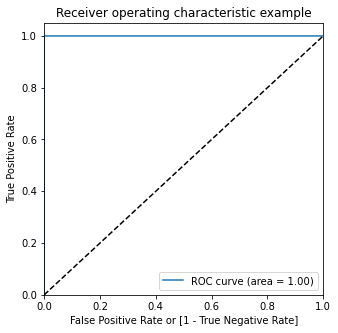

In [140]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [141]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.98      0.80      0.88       108

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



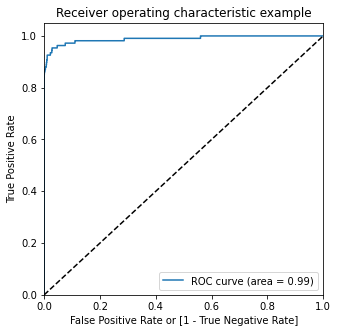

In [142]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model Summary
Train set

ROC : 100% F1 Score: 100%

Test set

ROC : 99% F1 score: 87.76%

# Inference: With unbalanced data set XGBoost has performed the best with F1 score of 87.76% on test data

# Model Builing using Balanced Data Set (SMOTE)

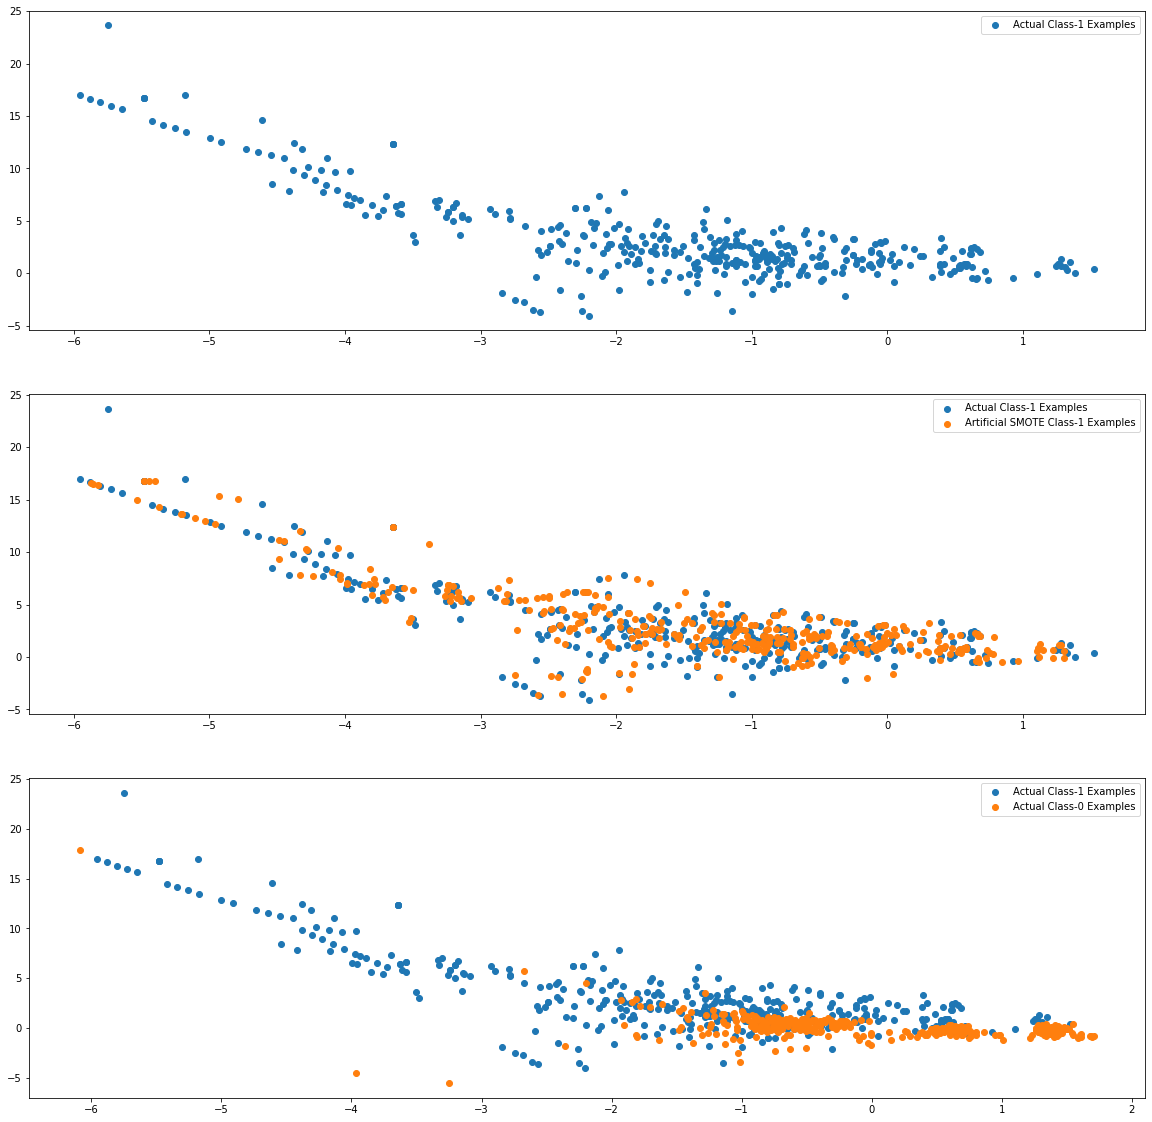

In [146]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


# 1) Logistic Regression using SMOTE

In [147]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9874323935260101
Best hyperparameters:  {'C': 1000}


In [148]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.742034,0.312919,0.054837,0.005814,0.01,{'C': 0.01},0.986739,0.987189,0.988281,0.986950,0.987746,0.987381,0.000562,6,0.987568,0.987434,0.987177,0.987448,0.987363,0.987398,0.000129
1,2.852308,0.151942,0.053235,0.005604,0.1,{'C': 0.1},0.986775,0.987243,0.988328,0.986995,0.987799,0.987428,0.000565,5,0.987614,0.987479,0.987228,0.987490,0.987413,0.987445,0.000126
2,2.856311,0.127987,0.050834,0.003819,1,{'C': 1},0.986778,0.987247,0.988332,0.986998,0.987804,0.987432,0.000565,4,0.987618,0.987483,0.987232,0.987493,0.987418,0.987449,0.000126
3,3.045445,0.202252,0.049434,0.003722,10,{'C': 10},0.986778,0.987248,0.988332,0.986999,0.987805,0.987432,0.000565,3,0.987618,0.987483,0.987232,0.987493,0.987418,0.987449,0.000126
4,2.853507,0.188455,0.051435,0.003443,100,{'C': 100},0.986778,0.987248,0.988332,0.986999,0.987805,0.987432,0.000565,2,0.987618,0.987483,0.987233,0.987494,0.987418,0.987449,0.000126
5,2.929760,0.207007,0.052035,0.003523,1000,{'C': 1000},0.986778,0.987248,0.988332,0.986999,0.987805,0.987432,0.000565,1,0.987619,0.987483,0.987233,0.987494,0.987418,0.987449,0.000126


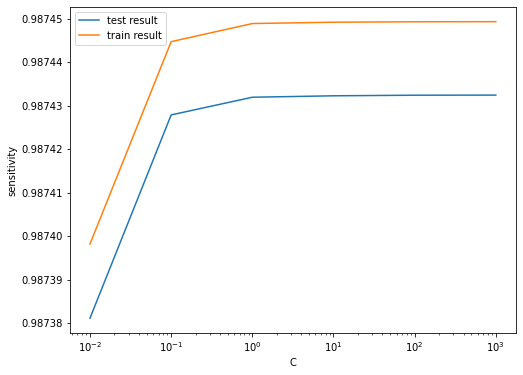

In [149]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [150]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [151]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

In [152]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.45%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227461
           1       0.97      0.92      0.94    227461

    accuracy                           0.95    454922
   macro avg       0.95      0.95      0.95    454922
weighted avg       0.95      0.95      0.95    454922



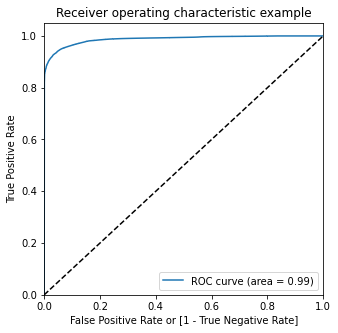

In [153]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [154]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 11.35%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56854
           1       0.06      0.92      0.11       108

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962



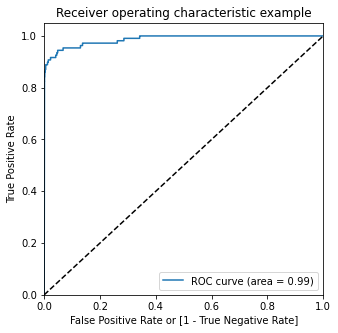

In [155]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

# Model Summary
Train set

ROC score : 99%

F1 score: 94.45%


Test set

ROC score : 99%

F1 score: 11.35%


# 2) Decision Tree using SMOTE

In [171]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.939716,0.066687,0.124083,0.009940,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.935436,0.951084,0.907814,0.931445,0.017889,5
1,7.985031,0.037518,0.085725,0.026467,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.935442,0.951092,0.907814,0.931449,0.017892,4
2,7.868596,0.138108,0.073717,0.011447,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.934863,0.958698,0.907613,0.933725,0.020871,2
3,7.653119,0.026299,0.068379,0.002625,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.930850,0.958698,0.907613,0.932387,0.020883,3
4,14.742057,0.068401,0.104070,0.009939,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.953533,0.951722,0.901370,0.935542,0.024174,1
5,15.077288,0.232285,0.094068,0.001639,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.945834,0.951723,0.893741,0.930433,0.026056,6
6,15.054457,0.121775,0.091062,0.024196,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932622,0.958616,0.892995,0.928078,0.026982,7
7,15.059814,0.039290,0.055370,0.006241,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.927491,0.958632,0.892992,0.926372,0.026809,8


In [175]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9355417898945532
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [176]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [177]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 77.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227461
           1       0.81      0.74      0.77       384

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



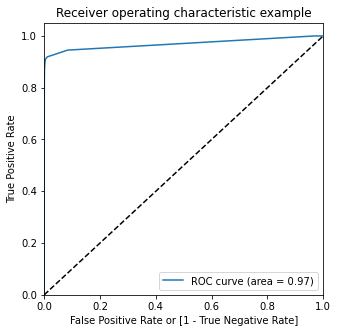

In [178]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [179]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 77.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.83      0.73      0.78       108

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



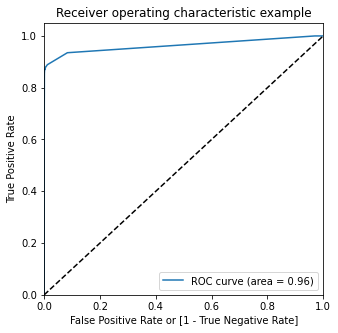

In [180]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


# Model Summary
Train set

ROC Score: 97%
F1 score : 77.38%
Test set

ROC Score: 96%
F1 score : 77.83%

# 3) XGBoost

In [165]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[17:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:18]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [157]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,70.296715,2.357830,0.299534,0.032036,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999577,0.999592,0.999678,0.999616,0.000044,4,0.999665,0.999675,0.999628,0.999656,0.000020
1,93.180189,0.450479,0.271182,0.004324,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999564,0.999541,0.999633,0.999579,0.000039,5,0.999638,0.999650,0.999610,0.999633,0.000017
2,115.816855,0.076727,0.268514,0.005911,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999549,0.999542,0.999636,0.999575,0.000043,6,0.999621,0.999648,0.999609,0.999626,0.000017
3,65.544193,0.196329,0.261176,0.006485,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999916,0.999896,0.999963,0.999925,0.000028,3,0.999966,0.999963,0.999963,0.999964,0.000001
4,100.562606,9.472320,0.262509,0.001701,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999926,0.999916,0.999975,0.999939,0.000026,2,0.999978,0.999975,0.999975,0.999976,0.000001
5,120.977637,8.027209,0.258174,0.000817,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999941,0.999912,0.999974,0.999942,0.000025,1,0.999979,0.999973,0.999974,0.999975,0.000002


In [158]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999421677584032
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [159]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [160]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[13:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [161]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227461
           1       1.00      1.00      1.00    227461

    accuracy                           1.00    454922
   macro avg       1.00      1.00      1.00    454922
weighted avg       1.00      1.00      1.00    454922



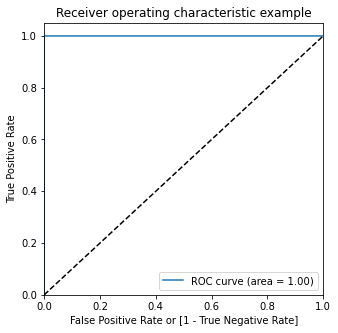

In [162]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [163]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 76.07%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.71      0.82      0.76       108

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



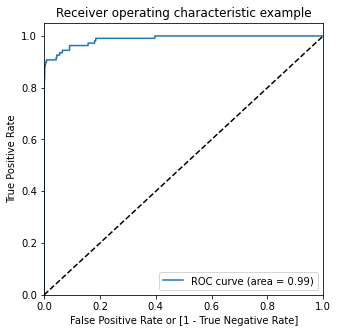

In [164]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


# Model Summary

Train set

ROC score : 100%

F1 score: 100%

Test set

ROC score : 99%

F1 score: 77.07%

# Summary: 
For Unbalanced dataset XGBoost perform the best with  the F1 score is 87 % on test data.
For Balanced dataset XGBoost perform the best with  the F1 score is 77.07 % on test data.